# LSST Air Transparency for a pure molecular absorbing sky

He we vary the ozone absorption.

- author Sylvie Dagoret-Campagne
- creation date Satuday  November 2016


The purpose is to compare the air transparency for pure molecular absorbing sky,

- precipitable water level is default from LibRadTran (4mm)
- Ozone vary from 200 DU to 600 DU

In [1]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
matplotlib.rc_file("templates/matplotlibrc")
import matplotlib.pyplot as plt
%matplotlib inline

/Users/dagoret-campagnesylvie/.local/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
import pandas as pd
import os
import re

In [3]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

### Defines where the LibRadTran files are

In [4]:
currentpath=os.getcwd()
rootpath_us='../simulations/RT/2.0/LS/pp/us/ab/lt/oz/out/'
rootpath_sw='../simulations/RT/2.0/LS/pp/sw/ab/lt/oz/out/'

### Build the list of the files

In [5]:
filelist_us=os.listdir(rootpath_us) 
filelist_sw=os.listdir(rootpath_sw) 

### Make a sublist of the files for sky afglsw

In [6]:
filelist_afglsw= []
for filename in filelist_sw:
    if re.search('z30',filename):  #example of filename filter
        filelist_afglsw.append(filename)

### Make a sublist of the files for sky afglus

In [7]:
filelist_afglus= []
for filename in filelist_us:
    if re.search('z30',filename): #example of filename filter
        filelist_afglus.append(filename)

### ### Show the air transparences for sky afglsw

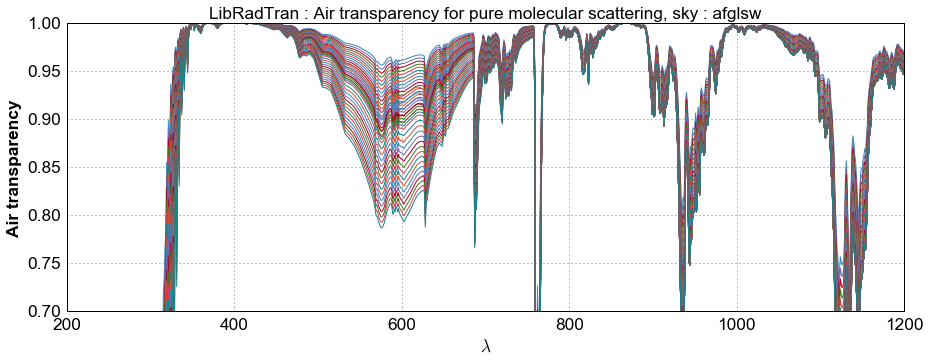

In [8]:
for filename in filelist_afglsw:
    fullpath=os.path.join(rootpath_sw,filename)
    data = np.loadtxt(fullpath)
    x=data[:,0]
    y=data[:,1]
    plt.plot(x,y)
    
plt.xlim(200,1200)
plt.ylim(0.7,1)
plt.xlabel('$\lambda$')
plt.ylabel('Air transparency')   
plt.title('LibRadTran : Air transparency for pure molecular scattering, sky : afglsw')

### Show the air transparences for sky afglus

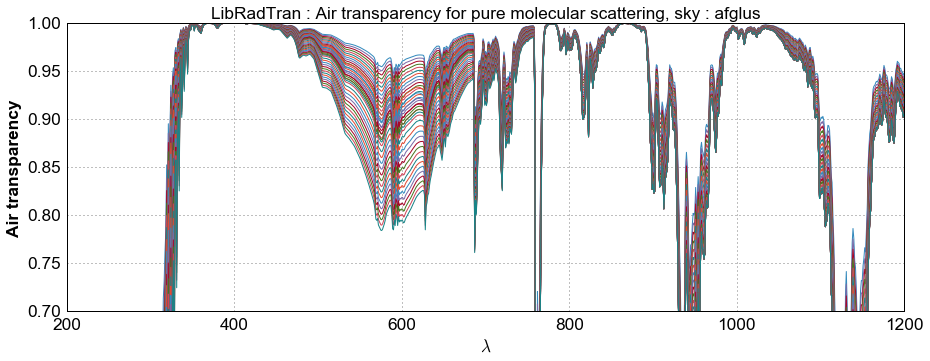

In [9]:
for filename in filelist_afglus:
    fullpath=os.path.join(rootpath_us,filename)
    data = np.loadtxt(fullpath)
    x=data[:,0]
    y=data[:,1]
    plt.plot(x,y)
    
plt.xlim(200,1200)
plt.ylim(0.7,1)
plt.xlabel('$\lambda$')
plt.ylabel('Air transparency')   
plt.title('LibRadTran : Air transparency for pure molecular scattering, sky : afglus')

## Conclusion

The transparencies are the same concerning the molecular scattering

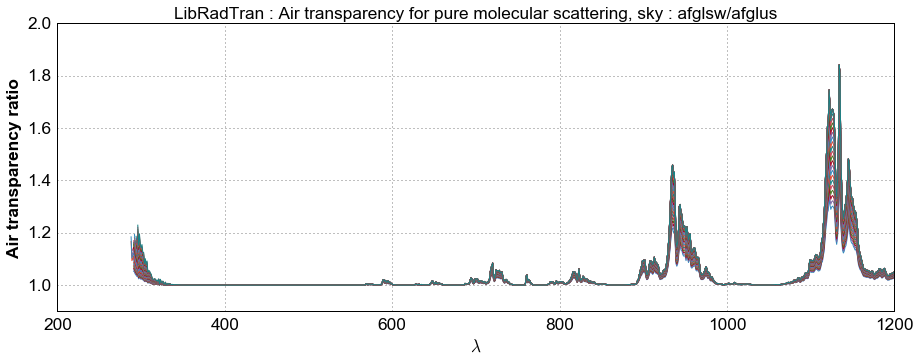

In [10]:
for index,filename1 in np.ndenumerate(filelist_afglus):
    idx=index[0]
    filename2=filelist_afglsw[idx]
    fullpath1=os.path.join(rootpath_us,filename1)
    fullpath2=os.path.join(rootpath_sw,filename2)
    data1 = np.loadtxt(fullpath1)
    x1=data1[:,0]
    y1=data1[:,1]
    data2 = np.loadtxt(fullpath2)
    x2=data2[:,0]
    y2=data2[:,1]
    ratio=y2/y1
    plt.plot(x1,ratio)
    
plt.xlim(200,1200)
plt.ylim(0.9,2.0)
plt.xlabel('$\lambda$')
plt.ylabel('Air transparency ratio')   
plt.title('LibRadTran : Air transparency for pure molecular scattering, sky : afglsw/afglus')    